In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("../resources"))

['file_helper.ipynb', 'cardio_train.csv', 'apple.csv', 'weather_2012_all.csv', 'titanic.csv', 'basic_imports.py', 'test_db.sqlite', 'weather_2012.sqlite', 'bikes.csv', 'fortune500.csv', 'Pairwise_Correlation_Cheat_Sheet.pdf', 'weather_2012_03.csv', 'popularity-contest.txt', 'Test Dataframe.csv', '311-service-requests.csv']


In [3]:
df = pd.read_csv("../resources/cardio_train.csv", sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df["age"] = np.floor(df["age"] / 365.25)  # округление к меньшему целому числу
df["gender"] = df["gender"].map({1: 0, 2: 1})

In [12]:
from sklearn.model_selection import train_test_split

    # Разделение массива на случайные обучающие и тестовые подмножества

X_train, X_vaild, y_train, y_vaild = train_test_split(df.drop("cardio",
                                                              axis=1),
                                                      df["cardio"],
                                                      test_size=0.3,
                                                      random_state=2019)

    # X_train, X_vaild, y_train, y_vaild Двумерные неоднородные табличные данные с изменяемым размером.
    # random_state - перетасовка

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=2019)

    # n_estimators - кол-во деревьев
    # random_state - перетасовка

rf.fit(X_train, y_train)

    # постоить rf  из обучающего набора

y_pred = rf.predict(X_vaild)

    # predict - предсказанный класс - тот, у которого самая высокая средняя вероятность по деревьям

from sklearn.metrics import accuracy_score
print(accuracy_score(y_vaild, y_pred))

0.7189523809523809


In [7]:
features = dict(zip(range(len(df.columns) - 1), df.columns[:-1]))
importances = rf.feature_importances_

In [8]:
indices = np.argsort(importances)[::-1]
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

In [22]:
print("Feature ranking:")  # рейтинг возможностей

for f in range(num_to_plot):
    print(f + 1, features[feature_indices[f]], importances[indices[f]])

Feature ranking:
1 id 0.21404270820154592
2 ap_hi 0.16891784649406416
3 weight 0.15462300910014903
4 height 0.13803614608132517
5 age 0.13121649005338507
6 ap_lo 0.0936626506267124
7 cholesterol 0.037555079269884196
8 gender 0.016909647014728867
9 gluc 0.01629976636779223
10 active 0.013152185709951128
11 smoke 0.008474395620701092
12 alco 0.0071100754597608826


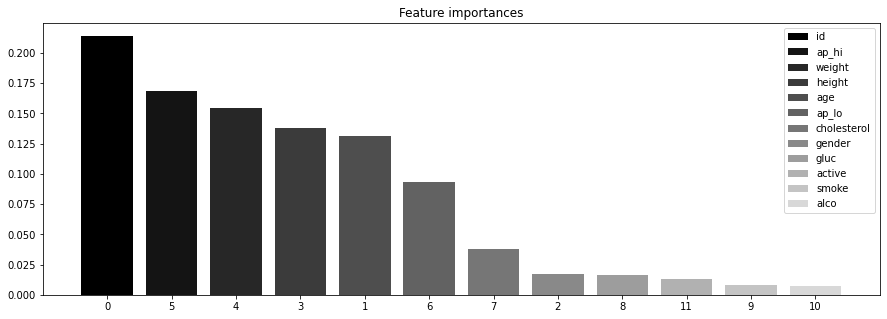

In [11]:
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center")
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features[i]) for i in feature_indices])